In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
cd ../

c:\Users\okpl8\Documents\project_LG


In [3]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [4]:
train = train.drop('ID', axis = 1)
test = test.drop('ID', axis = 1)

In [5]:
for col in train.columns:
    print(train.value_counts(col))

시술 시기 코드
TRDQAZ    38969
TRCMWS    38090
TRYBLT    36713
TRVNRY    36173
TRJXFG    36031
TRZKPL    35544
TRXQMD    34831
Name: count, dtype: int64
시술 당시 나이
만18-34세    102476
만35-37세     57780
만38-39세     39247
만40-42세     37348
만43-44세     12253
만45-50세      6918
알 수 없음        329
Name: count, dtype: int64
임신 시도 또는 마지막 임신 경과 연수
7.0     1214
8.0     1176
9.0     1023
6.0      991
10.0     947
11.0     701
5.0      692
12.0     510
13.0     481
14.0     331
4.0      305
15.0     254
16.0     202
17.0     140
18.0     106
3.0       89
19.0      86
20.0      83
2.0       21
0.0       12
1.0        6
Name: count, dtype: int64
시술 유형
IVF    250060
DI       6291
Name: count, dtype: int64
특정 시술 유형
ICSI                                   122368
IVF                                     91755
Unknown                                 26939
IUI                                      6100
ICSI:ICSI                                2314
ICSI / BLASTOCYST                        1609
IVF / BLASTOCYST          

In [6]:
train_missing_values = train.isnull().sum()
train_missing_columns=train_missing_values[train_missing_values > 0]

print(train_missing_columns)

임신 시도 또는 마지막 임신 경과 연수    246981
특정 시술 유형                      2
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
배아 생성 주요 이유                6291
총 생성 배아 수                  6291
미세주입된 난자 수                 6291
미세주입에서 생성된 배아 수            6291
이식된 배아 수                   6291
미세주입 배아 이식 수               6291
저장된 배아 수                   6291
미세주입 후 저장된 배아 수            6291
해동된 배아 수                   6291
해동 난자 수                    6291
수집된 신선 난자 수                6291
저장된 신선 난자 수                6291
혼합된 난자 수                   6291
파트너 정자와 혼합된 난자 수           6291
기증자 정자와 혼합된 난자 수           6291
동결 배아 사용 여부                6291
신선 배아 사용 여부                6291
기증 배아 사용 여부                6291
대리모 여부                     6291
PGD 시술 여부                254172
PGS 시술 여부                254422
난자 채취 경과일                 57488
난자 해동 경과일                254915
난자 혼합 경과일                 53735
배아 이식 경과일                 43566
배아 해동 경과일                215982
dtype: i

In [7]:
a=pd.crosstab(train['착상 전 유전 진단 사용 여부'], train['PGD 시술 여부'],dropna=False)
a

PGD 시술 여부,1.0,NaN
착상 전 유전 진단 사용 여부,,
0.0,0,246864
1.0,2179,1017
NaN,0,6291


In [8]:
a=pd.crosstab(train['PGS 시술 여부'], train['착상 전 유전 검사 사용 여부'],dropna=False)
a

착상 전 유전 검사 사용 여부,1.0,NaN
PGS 시술 여부,,
1.0,1929,0
NaN,789,253633


In [9]:
# 결측치 비율 계산
train_missing_values=train.isnull().sum()
missing_ratio = (train_missing_values / len(train)) * 100
print("\n결측치 비율(%):")
print(missing_ratio[missing_ratio > 0])


결측치 비율(%):
임신 시도 또는 마지막 임신 경과 연수    96.344855
특정 시술 유형                  0.000780
단일 배아 이식 여부               2.454057
착상 전 유전 검사 사용 여부         98.939735
착상 전 유전 진단 사용 여부          2.454057
배아 생성 주요 이유               2.454057
총 생성 배아 수                 2.454057
미세주입된 난자 수                2.454057
미세주입에서 생성된 배아 수           2.454057
이식된 배아 수                  2.454057
미세주입 배아 이식 수              2.454057
저장된 배아 수                  2.454057
미세주입 후 저장된 배아 수           2.454057
해동된 배아 수                  2.454057
해동 난자 수                   2.454057
수집된 신선 난자 수               2.454057
저장된 신선 난자 수               2.454057
혼합된 난자 수                  2.454057
파트너 정자와 혼합된 난자 수          2.454057
기증자 정자와 혼합된 난자 수          2.454057
동결 배아 사용 여부               2.454057
신선 배아 사용 여부               2.454057
기증 배아 사용 여부               2.454057
대리모 여부                    2.454057
PGD 시술 여부                99.149994
PGS 시술 여부                99.247516
난자 채취 경과일                22.425503
난자 해동 경과일                99.439831
난자 혼합 경과

In [10]:
train.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)
test.drop(columns=['PGD 시술 여부','PGS 시술 여부','난자 해동 경과일','배아 해동 경과일',
            '임신 시도 또는 마지막 임신 경과 연수','착상 전 유전 검사 사용 여부'],inplace=True)

In [11]:
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

def categorize_treatment(x):
    first_part = x.split(":")[0]  # 첫 번째 값 가져오기

    if first_part == "ICSI":
        return "ICSI"
    elif first_part == "IVF":
        return "IVF"
    elif first_part in ["IUI", "ICI"]:
        return "IUI"
    else:
        return "Unknown"

# ✅ 그룹화 적용 (train & test)
train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)
test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)

In [12]:
mode_cols = ["착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "해동 난자 수", "저장된 신선 난자 수", "기증자 정자와 혼합된 난자 수",
             "기증 배아 사용 여부", "대리모 여부"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

In [13]:
mode_cols = ["단일 배아 이식 여부", "미세주입 후 저장된 배아 수", "해동된 배아 수", "동결 배아 사용 여부", "신선 배아 사용 여부",
             "난자 채취 경과일", "난자 혼합 경과일","저장된 배아 수","미세주입에서 생성된 배아 수","미세주입 배아 이식 수", "미세주입된 난자 수"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

In [14]:
median_cols = ['총 생성 배아 수','','이식된 배아 수','수집된 신선 난자 수','혼합된 난자 수','파트너 정자와 혼합된 난자 수','배아 이식 경과일']
for col in median_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].median()  # 🚨 Train 데이터의 중앙값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

컬럼 이(가) train 또는 test 데이터에 없습니다.


In [15]:
# 결측치가 존재하는 열과 개수 출력
train_missing_values=train.isnull().sum()
train_missing_columns=train_missing_values[train_missing_values > 0]

test_missing_values=test.isnull().sum()
test_missing_columns=test_missing_values[test_missing_values>0]

print("트레인 결측치:")
print(train_missing_columns)
print("="*50)
print("테스트 결측치:")
print(test_missing_columns)

트레인 결측치:
Series([], dtype: int64)
테스트 결측치:
Series([], dtype: int64)


In [16]:
train.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)
test.drop(columns=['배란 유도 유형','난자 기증자 나이','정자 기증자 나이'],inplace=True)

In [17]:
train.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)
test.drop(columns=['난자 채취 경과일','불임 원인 - 여성 요인','불임 원인 - 정자 면역학적 요인'],inplace=True)

In [18]:

# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

In [19]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['난자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['난자 출처'] = train['난자 출처'].replace('알 수 없음', most_frequent)
test['난자 출처'] = test['난자 출처'].replace('알 수 없음', most_frequent)

print(train['난자 출처'].value_counts())

난자 출처
본인 제공    240582
기증 제공     15769
Name: count, dtype: int64


In [20]:
# '난자 출처'에서 최빈값 확인
most_frequent = train['정자 출처'].mode()[0]

# '알 수 없음'을 최빈값으로 대체
train['정자 출처'] = train['정자 출처'].replace('배우자 및 기증 제공', most_frequent)
train['정자 출처'] = train['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('미할당', most_frequent)
test['정자 출처'] = test['정자 출처'].replace('배우자 및 기증 제공', most_frequent)

print(train['정자 출처'].value_counts())

정자 출처
배우자 제공    229335
기증 제공      27016
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

label_col=['시술 시기 코드','시술 당시 나이','총 시술 횟수','클리닉 내 총 시술 횟수','IVF 시술 횟수','DI 시술 횟수',
           '총 임신 횟수','IVF 임신 횟수','DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
# Label Encoding

for col in label_col:
    # Label Encoder 생성
    le = LabelEncoder()
    
    # Train 데이터에 Label Encoding 적용
    train[col] = le.fit_transform(train[col].astype(str))
    
    # Test 데이터에 동일한 Label Encoding 적용
    test[col] = le.transform(test[col].astype(str))  # Test에는 transform만 적용

# 인코딩 확인
print(train[label_col].head())
print(test[label_col].head())

   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         6         0        0              0          0         0        0   
1         5         5        0              0          0         0        0   
2         3         0        1              0          1         0        0   
3         2         1        1              1          1         0        0   
4         3         0        0              0          0         0        0   

   IVF 임신 횟수  DI 임신 횟수  총 출산 횟수  IVF 출산 횟수  DI 출산 횟수  
0          0         0        0          0         0  
1          0         0        0          0         0  
2          0         0        0          0         0  
3          0         0        0          0         0  
4          0         0        0          0         0  
   시술 시기 코드  시술 당시 나이  총 시술 횟수  클리닉 내 총 시술 횟수  IVF 시술 횟수  DI 시술 횟수  총 임신 횟수  \
0         5         1        1              1          1         0        0   
1         1         0        0       

In [22]:
# ✅ 비율 Feature 추가
train["임신 성공률"] = train["총 임신 횟수"] / (train["총 시술 횟수"] + 1)
train["IVF 성공률"] = train["IVF 임신 횟수"] / (train["IVF 시술 횟수"] + 1)
train["DI 성공률"] = train["DI 임신 횟수"] / (train["DI 시술 횟수"] + 1)
train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
train["배아 이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)

train["IVF 대비 DI 비율"] = train["IVF 시술 횟수"] / (train["DI 시술 횟수"] + 1)
train["혼합 난자 사용 비율"] = (train["기증자 정자와 혼합된 난자 수"] + train["파트너 정자와 혼합된 난자 수"]) / (train["총 생성 배아 수"] + 1)
train["고령 시술 비율"] = train["시술 당시 나이"] / (train["총 시술 횟수"] + 1)

# Test 데이터에도 동일 적용
test["임신 성공률"] = test["총 임신 횟수"] / (test["총 시술 횟수"] + 1)
test["IVF 성공률"] = test["IVF 임신 횟수"] / (test["IVF 시술 횟수"] + 1)
test["DI 성공률"] = test["DI 임신 횟수"] / (test["DI 시술 횟수"] + 1)
test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
test["배아 이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)

test["IVF 대비 DI 비율"] = test["IVF 시술 횟수"] / (test["DI 시술 횟수"] + 1)
test["혼합 난자 사용 비율"] = (test["기증자 정자와 혼합된 난자 수"] + test["파트너 정자와 혼합된 난자 수"]) / (test["총 생성 배아 수"] + 1)
test["고령 시술 비율"] = test["시술 당시 나이"] / (test["총 시술 횟수"] + 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder

onehot_col=['시술 유형','특정 시술 유형','배아 생성 주요 이유','난자 출처','정자 출처'] 

# OneHotEncoder 생성
ohe = OneHotEncoder(sparse_output=False, drop='first')  # drop='first'는 더미 변수 함정 방지

# Train 데이터에 One-Hot Encoding 적용
train_encoded = ohe.fit_transform(train[onehot_col])

# Test 데이터에 동일한 One-Hot Encoding 적용
test_encoded = ohe.transform(test[onehot_col])

# 인코딩된 데이터를 DataFrame으로 변환하고 기존 데이터와 합치기
train_encoded_df = pd.DataFrame(train_encoded, columns=ohe.get_feature_names_out(onehot_col))
test_encoded_df = pd.DataFrame(test_encoded, columns=ohe.get_feature_names_out(onehot_col))

train = pd.concat([train.drop(columns=onehot_col), train_encoded_df], axis=1)
test = pd.concat([test.drop(columns=onehot_col), test_encoded_df], axis=1)

In [ ]:
# # ✅ 비율 Feature 추가
# train["임신 성공률"] = train["총 임신 횟수"] / (train["총 시술 횟수"] + 1)
# train["IVF 성공률"] = train["IVF 임신 횟수"] / (train["IVF 시술 횟수"] + 1)
# train["DI 성공률"] = train["DI 임신 횟수"] / (train["DI 시술 횟수"] + 1)
# train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
# train["배아 이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)

# train["IVF 대비 DI 비율"] = train["IVF 시술 횟수"] / (train["DI 시술 횟수"] + 1)
# train["혼합 난자 사용 비율"] = (train["기증자 정자와 혼합된 난자 수"] + train["파트너 정자와 혼합된 난자 수"]) / (X_train["총 생성 배아 수"] + 1)
# train["고령 시술 비율"] = train["시술 당시 나이"] / (train["총 시술 횟수"] + 1)

# # Test 데이터에도 동일 적용
# test["임신 성공률"] = test["총 임신 횟수"] / (test["총 시술 횟수"] + 1)
# test["IVF 성공률"] = test["IVF 임신 횟수"] / (test["IVF 시술 횟수"] + 1)
# test["DI 성공률"] = test["DI 임신 횟수"] / (test["DI 시술 횟수"] + 1)
# test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
# test["배아 이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)

# test["IVF 대비 DI 비율"] = test["IVF 시술 횟수"] / (test["DI 시술 횟수"] + 1)
# test["혼합 난자 사용 비율"] = (test["기증자 정자와 혼합된 난자 수"] + test["파트너 정자와 혼합된 난자 수"]) / (X_test["총 생성 배아 수"] + 1)
# test["고령 시술 비율"] = test["시술 당시 나이"] / (test["총 시술 횟수"] + 1)

In [26]:
train.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)
test.drop(columns=['남성 주 불임 원인','IVF 시술 횟수','IVF 임신 횟수','IVF 출산 횟수','미세주입에서 생성된 배아 수',
                    '파트너 정자와 혼합된 난자 수'],inplace=True)

In [27]:
train.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)
test.drop(columns=['여성 주 불임 원인','DI 임신 횟수','DI 출산 횟수','혼합된 난자 수'],inplace=True)

In [28]:
train.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)
test.drop(columns=['부부 부 불임 원인','총 시술 횟수','총 출산 횟수','수집된 신선 난자 수','동결 배아 사용 여부',
                    '신선 배아 사용 여부'],inplace=True)

In [29]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.7 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.7 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars >= 0.7]  # 0.7 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.7 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

시술 당시 나이: 고령 시술 비율: 0.74
총 임신 횟수: 임신 성공률: 0.89, IVF 성공률: 0.86, 출산 성공률: 0.78
임신 성공률: 총 임신 횟수: 0.89, IVF 성공률: 0.97, 출산 성공률: 0.75
IVF 성공률: 총 임신 횟수: 0.86, 임신 성공률: 0.97, 출산 성공률: 0.73
출산 성공률: 총 임신 횟수: 0.78, 임신 성공률: 0.75, IVF 성공률: 0.73
고령 시술 비율: 시술 당시 나이: 0.74


In [30]:

# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0. 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.9 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars > 0.9]  # 0.9 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.9 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

임신 성공률: IVF 성공률: 0.97
IVF 성공률: 임신 성공률: 0.97


In [31]:
mode_cols = ["단일 배아 이식 여부", "미세주입 후 저장된 배아 수", "해동된 배아 수", "동결 배아 사용 여부", "신선 배아 사용 여부",
             "난자 채취 경과일", "난자 혼합 경과일","저장된 배아 수","미세주입에서 생성된 배아 수","미세주입 배아 이식 수", "미세주입된 난자 수"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

컬럼 동결 배아 사용 여부이(가) train 또는 test 데이터에 없습니다.
컬럼 신선 배아 사용 여부이(가) train 또는 test 데이터에 없습니다.
컬럼 난자 채취 경과일이(가) train 또는 test 데이터에 없습니다.
컬럼 미세주입에서 생성된 배아 수이(가) train 또는 test 데이터에 없습니다.


In [32]:
mode_cols = ["착상 전 유전 진단 사용 여부", "배아 생성 주요 이유", "해동 난자 수", "저장된 신선 난자 수", "기증자 정자와 혼합된 난자 수",
             "기증 배아 사용 여부", "대리모 여부"]

for col in mode_cols:
    if col in train.columns and col in test.columns:  # train과 test 모두 해당 컬럼이 있을 때만 실행
        mean_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값
        train[col] = train[col].fillna(mean_value)  # inplace=False 방식으로 수정
        test[col] = test[col].fillna(mean_value)    # inplace=False 방식으로 수정
    else:
        print(f"컬럼 {col}이(가) train 또는 test 데이터에 없습니다.")

컬럼 배아 생성 주요 이유이(가) train 또는 test 데이터에 없습니다.


----------------------shap로 확인 후 추가한것---------------------

In [34]:
drop_features = [
    "배아 생성 주요 이유_Donation", "배아 생성 주요 이유_Egg Storage", "불임 원인 - 자궁경부 문제",
    "불임 원인 - 정자 운동성", "특정 시술 유형_IUI", "난자 혼합 경과일", "해동 난자 수",
    "대리모 여부", "불임 원인 - 정자 형태"
]
train.drop(columns=drop_features, inplace=True)
test.drop(columns=drop_features, inplace=True)

In [33]:
# 상관행렬 계산
corr_matrix = train.corr()

# 상관관계가 0.7 이상인 값만 선택 (자기 자신과의 상관관계 제외)
high_corr = corr_matrix[(corr_matrix > 0.7) & (corr_matrix < 1)]

# 결과를 변수와 해당 변수와 0.7 이상인 상관관계를 가진 다른 변수들로 출력
for col in high_corr.columns:
    related_vars = high_corr[col].dropna()  # 결측치 제외
    related_vars = related_vars[related_vars >= 0.7]  # 0.7 이상인 값만 선택
    if len(related_vars) > 0:  # 상관관계가 0.7 이상인 값이 있을 경우
        print(f"{col}: {', '.join([f'{var}: {related_vars[var]:.2f}' for var in related_vars.index])}")

시술 당시 나이: 고령 시술 비율: 0.74
총 임신 횟수: 임신 성공률: 0.89, IVF 성공률: 0.86, 출산 성공률: 0.78
임신 성공률: 총 임신 횟수: 0.89, IVF 성공률: 0.97, 출산 성공률: 0.75
IVF 성공률: 총 임신 횟수: 0.86, 임신 성공률: 0.97, 출산 성공률: 0.73
출산 성공률: 총 임신 횟수: 0.78, 임신 성공률: 0.75, IVF 성공률: 0.73
고령 시술 비율: 시술 당시 나이: 0.74


---------shap-------

In [35]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import numpy as np

# ✅ 데이터 분할
X = train.drop(columns=['임신 성공 여부'])
y = train['임신 성공 여부']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
models = {
    "Extra Trees": ExtraTreesClassifier(max_depth= 15, min_samples_split = 10, n_estimators = 619, random_state=42, n_jobs=-1),
    "CatBoost": CatBoostClassifier(depth = 5, iterations= 4733, learning_rate= 0.052153844058674126, verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(max_depth=4, learning_rate=  0.04837287275958974, n_estimators= 472, random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(max_depth = 4, learning_rate= 0.02379326289805242, n_estimators=917, random_state=42, n_jobs=-1),
    "Random Forest": RandomForestClassifier(max_depth=15, n_estimators=494, min_samples_split=5, random_state=42),
}

In [37]:
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report

In [38]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import VotingClassifier

In [40]:
# import numpy as np
# import pandas as pd
# import optuna
# from sklearn.model_selection import cross_val_score, StratifiedKFold
# from sklearn.metrics import roc_auc_score
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier


# # ✅ KFold 설정
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # ✅ 최적화할 모델 리스트
# model_classes = {
#     "Extra Trees": ExtraTreesClassifier,
#     "CatBoost": CatBoostClassifier,
#     "LightGBM": LGBMClassifier,
#     # "XGBoost": XGBClassifier,
#     "Random Forest": RandomForestClassifier
# }

# # ✅ Optuna 최적화 함수 정의
# def objective(trial, model_name):
#     """ 각 모델별 최적 하이퍼파라미터를 찾는 Optuna 목적 함수 """
    
#     params = {}
    
#     if model_name == "Extra Trees":
#         params = {
#             "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#             "max_depth": trial.suggest_int("max_depth", 3, 15),
#             "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
#             "random_state": 42,
#             "n_jobs": -1
#         }
    
#     elif model_name == "CatBoost":
#         params = {
#             "iterations": trial.suggest_int("iterations", 100, 1000),
#             "depth": trial.suggest_int("depth", 3, 10),
#             "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
#             "random_state": 42,
#             "verbose": 0
#         }
    
#     elif model_name == "LightGBM":
#         params = {
#             "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#             "max_depth": trial.suggest_int("max_depth", 3, 15),
#             "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
#             "random_state": 42,
#             "n_jobs": -1
#         }
    
#     # elif model_name == "XGBoost":
#     #     params = {
#     #         "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#     #         "max_depth": trial.suggest_int("max_depth", 3, 15),
#     #         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
#     #         "random_state": 42,
#     #         "n_jobs": -1
#     #     }
    
#     elif model_name == "Random Forest":
#         params = {
#             "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#             "max_depth": trial.suggest_int("max_depth", 3, 15),
#             "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
#             "random_state": 42
#         }
    
#     # 모델 객체 생성
#     model = model_classes[model_name](**params)
    
#     # 5-Fold Cross Validation 수행
#     scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="roc_auc", n_jobs=-1)
    
#     return np.mean(scores)  # ROC-AUC 평균값 반환

# # ✅ 모델별 최적 파라미터 찾기
# best_params = {}

# for model_name in model_classes.keys():
#     print(f"\n🔎 Finding best parameters for {model_name}...")
    
#     study = optuna.create_study(direction="maximize")
#     study.optimize(lambda trial: objective(trial, model_name), n_trials=30)  # 30번 최적화 수행
    
#     best_params[model_name] = study.best_params
#     print(f"✅ Best params for {model_name}: {study.best_params}")

# # ✅ 최적 파라미터 출력
# print("\n📌 All Best Parameters:")
# for model, params in best_params.items():
#     print(f"{model}: {params}")


In [41]:
# ✅ 각 모델별 Test 예측값을 저장할 리스트 (Soft Voting 적용을 위한 확률 평균)
test_predictions = {name: np.zeros(X_test.shape[0]) for name in models.keys() if hasattr(models[name], "predict_proba")}
submission_predictions = {name: np.zeros(test.shape[0]) for name in models.keys() if hasattr(models[name], "predict_proba")}

# ✅ KFold 적용
roc_auc_scores = []  # ROC-AUC 점수 저장 리스트

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n=== Fold {fold+1} ===")

    # KFold 데이터 분할
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    for name, model in models.items():
        if hasattr(model, "predict_proba"):  # `predict_proba()`를 지원하는 모델만 사용
            print(f"\n--- Training {name} ---")
            
            # 모델 학습
            model.fit(X_train_fold, Y_train_fold)
            # 훈련 세트 성능 평가
            Y_train_pred = model.predict(X_train_fold)
            print("\n--- Training Set Performance ---")
            print(classification_report(Y_train_fold, Y_train_pred))
            

            # ✅ 검증 데이터 예측 (Positive Class 확률만 저장)
            Y_val_pred_proba = model.predict_proba(X_val_fold)[:, 1]
            # 검증 세트 성능 평가
            Y_val_pred = model.predict(X_val_fold)
            print("\n--- Validation Set Performance ---")
            print(classification_report(Y_val_fold, Y_val_pred))

            # ✅ ROC-AUC 점수 계산 및 저장
            roc_auc = roc_auc_score(Y_val_fold, Y_val_pred_proba)
            roc_auc_scores.append(roc_auc)
            print(f"📊 ROC-AUC (Fold {fold+1}, {name}): {roc_auc:.4f}")

            # ✅ X_test 예측값 저장 (Soft Voting을 위해 확률 예측값 사용)
            test_pred = model.predict_proba(X_test)[:, 1]  # Positive Class(1) 확률
            test_predictions[name] += test_pred / kf.n_splits  # 확률 평균 계산

            # ✅ 실제 test.csv 데이터 예측값 저장
            submission_pred = model.predict_proba(test)[:, 1]  # Positive Class(1) 확률
            submission_predictions[name] += submission_pred / kf.n_splits  # 확률 평균 계산

        else:
            print(f"⚠ Warning: {name} 모델은 `predict_proba()`를 지원하지 않습니다. 제외됨.")



=== Fold 1 ===

--- Training Extra Trees ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.75      1.00      0.86    121470
           1       0.93      0.04      0.08     42594

    accuracy                           0.75    164064
   macro avg       0.84      0.52      0.47    164064
weighted avg       0.80      0.75      0.65    164064


--- Validation Set Performance ---
              precision    recall  f1-score   support

           0       0.75      1.00      0.85     30508
           1       0.56      0.01      0.02     10508

    accuracy                           0.74     41016
   macro avg       0.65      0.50      0.44     41016
weighted avg       0.70      0.74      0.64     41016

📊 ROC-AUC (Fold 1, Extra Trees): 0.7359

--- Training CatBoost ---

--- Training Set Performance ---
              precision    recall  f1-score   support

           0       0.78      0.97      0.86    121470
           1       0

In [42]:
# # ✅ Platt Scaling (Sigmoid) 적용
# calibrated_lgbm = CalibratedClassifierCV(models["LightGBM"], method="sigmoid", cv=5)
# calibrated_lgbm.fit(X_train, y_train)

# # ✅ 보정된 확률 예측
# calibrated_pred_proba_test = calibrated_lgbm.predict_proba(X_test)[:, 1]
# calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# # ✅ ROC-AUC 평가
# calibrated_roc_auc = roc_auc_score(y_test, calibrated_pred_proba_test)
# print(f"\n📊 Calibrated LightGBM ROC-AUC Score (Sigmoid): {calibrated_roc_auc:.4f}")

# # ✅ test.csv에 대한 예측 확률 보정 적용
# calibrated_pred_proba_submission = calibrated_lgbm.predict_proba(test)[:, 1]

# # ✅ Soft Voting 가중치 변경 (LightGBM의 영향력 증가)
# ensemble_pred_proba_test = (
#     calibrated_pred_proba_test * 0.6 +  # LightGBM 60%
#     test_predictions["XGBoost"][:, 1] * 0.2 +  # XGBoost 20%
#     test_predictions["CatBoost"][:, 1] * 0.2  # CatBoost 20%
# )

# ensemble_pred_proba_submission = (
#     calibrated_pred_proba_submission * 0.6 +
#     submission_predictions["XGBoost"][:, 1] * 0.2 +
#     submission_predictions["CatBoost"][:, 1] * 0.2
# )


# # ✅ 최적 Threshold 찾기
# from sklearn.metrics import precision_recall_curve

# # ✅ Precision-Recall Curve 기반 최적 Threshold 찾기
# precision, recall, thresholds = precision_recall_curve(y_test, ensemble_pred_proba_test)
# f1_scores = (2 * precision * recall) / (precision + recall)
# optimal_threshold = thresholds[f1_scores[:-1].argmax()]

# print(f"Optimal Threshold: {optimal_threshold:.4f}")

# # ✅ 최적 Threshold 적용 후 예측값 변환
# Y_test_pred = (calibrated_pred_proba_test > 0.5).astype(int)

# print("\n=== Final Test Evaluation with Optimized Threshold ===")
# print(classification_report(y_test, Y_test_pred))

In [ ]:
import optuna

# ✅ Platt Scaling (Sigmoid) 적용
calibrated_models = {}

for model_name in ["Random Forest", "CatBoost", "Extra Trees", "LightGBM"]:
    try:
        print(f"Calibrating {model_name}...")
        calibrated_models[model_name] = CalibratedClassifierCV(models[model_name], method="isotonic", cv=5)
        calibrated_models[model_name].fit(X_train, y_train)
    except Exception as e:
        print(f"⚠️ Calibration failed for {model_name}: {e}")

# ✅ 보정된 확률 예측 저장
calibrated_pred_proba_test = {
    model_name: calibrated_models[model_name].predict_proba(X_test)[:, 1]
    for model_name in calibrated_models
}

calibrated_pred_proba_submission = {
    model_name: calibrated_models[model_name].predict_proba(test)[:, 1]
    for model_name in calibrated_models
}

# # ✅ 최적 Soft Voting 가중치 찾기
# def objective(trial):
#     w_xgb = trial.suggest_float("w_xgb", 0.1, 0.5)
#     w_lgb = trial.suggest_float("w_lgb", 0.1, 0.5)
#     w_cat = trial.suggest_float("w_cat", 0.1, 0.5)
#     w_rf = trial.suggest_float("w_rf", 0.05, 0.3)
#     w_ext = trial.suggest_float("w_ext", 0.05, 0.3)

#     # Soft Voting 적용
#     ensemble_pred_proba_test = (
#         test_predictions["XGBoost"] * w_xgb +
#         calibrated_pred_proba_test["LightGBM"] * w_lgb +
#         calibrated_pred_proba_test["CatBoost"] * w_cat +
#         calibrated_pred_proba_test["Random Forest"] * w_rf +
#         calibrated_pred_proba_test["Extra Trees"] * w_ext
#     )

#     return roc_auc_score(y_test, ensemble_pred_proba_test)

# # Optuna 최적화 실행
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# # ✅ 최적 가중치 출력
# best_weights = study.best_params
# print(f"\n🔎 최적 Soft Voting 가중치: {best_weights}")


# ✅ 최적 가중치 적용 후 Soft Voting
ensemble_pred_proba_test = (
    test_predictions["XGBoost"] * 0.41590671750912966 +
    calibrated_pred_proba_test["LightGBM"] * 0.4985557677497247 +
    calibrated_pred_proba_test["CatBoost"] * 0.17378238941331203 +
    calibrated_pred_proba_test["Random Forest"] * 0.05236890594772381 +
    calibrated_pred_proba_test["Extra Trees"] * 0.05283185785986821
)

ensemble_pred_proba_submission = (
    submission_predictions["XGBoost"] * 0.41590671750912966 +
    calibrated_pred_proba_submission["LightGBM"] * 0.4985557677497247 +
    calibrated_pred_proba_submission["CatBoost"] * 0.17378238941331203 +
    calibrated_pred_proba_submission["Random Forest"] *0.05236890594772381 +
    calibrated_pred_proba_submission["Extra Trees"] * 0.05283185785986821
)
# ensemble_pred_proba_test = (
#     test_predictions["XGBoost"] * 0.35 +
#     calibrated_pred_proba_test["LightGBM"] * 0.35 +
#     calibrated_pred_proba_test["CatBoost"] * 0.2 +
#     calibrated_pred_proba_test["Random Forest"] * 0.05 +
#     calibrated_pred_proba_test["Extra Trees"] * 0.05
# )

# ensemble_pred_proba_submission = (
#     submission_predictions["XGBoost"] * 0.35 +
#     calibrated_pred_proba_submission["LightGBM"] * 0.35 +
#     calibrated_pred_proba_submission["CatBoost"] * 0.2 +
#     calibrated_pred_proba_submission["Random Forest"] * 0.05 +
#     calibrated_pred_proba_submission["Extra Trees"] * 0.05
# )



# ✅ 최적 Threshold 찾기
from sklearn.metrics import precision_recall_curve

# ✅ Precision-Recall Curve 기반 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(y_test, ensemble_pred_proba_test)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores[:-1].argmax()]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ ROC-AUC 점수 계산
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)
print(f"\n📈 최종 ROC-AUC Score: {final_roc_auc:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (ensemble_pred_proba_test > optimal_threshold).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold ===")
print(classification_report(y_test, Y_test_pred))




c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Calibrating Random Forest...
Calibrating CatBoost...


In [ ]:
# ✅ 최종 ROC-AUC 점수 계산 (파일명용)
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)

# ✅ Kaggle 제출 파일 생성
submission_filename = f'./data/submission_calibrated_ensemble_f1{final_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['probability'] = ensemble_pred_proba_submission  # XGBoost를 중심으로 설정
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")


✅ 제출 파일이 생성되었습니다: ./data/submission_calibrated_ensemble_f10.7385.csv


In [ ]:
import optuna

# ✅ Platt Scaling (Sigmoid) 적용
calibrated_models = {}

for model_name in ["Random Forest", "CatBoost", "Extra Trees", "LightGBM"]:
    try:
        print(f"Calibrating {model_name}...")
        calibrated_models[model_name] = CalibratedClassifierCV(models[model_name], method="sigmoid", cv=5)
        calibrated_models[model_name].fit(X_train, y_train)
    except Exception as e:
        print(f"⚠️ Calibration failed for {model_name}: {e}")

# ✅ 보정된 확률 예측 저장
calibrated_pred_proba_test = {
    model_name: calibrated_models[model_name].predict_proba(X_test)[:, 1]
    for model_name in calibrated_models
}

calibrated_pred_proba_submission = {
    model_name: calibrated_models[model_name].predict_proba(test)[:, 1]
    for model_name in calibrated_models
}

# # ✅ 최적 Soft Voting 가중치 찾기
# def objective(trial):
#     w_xgb = trial.suggest_float("w_xgb", 0.1, 0.5)
#     w_lgb = trial.suggest_float("w_lgb", 0.1, 0.5)
#     w_cat = trial.suggest_float("w_cat", 0.1, 0.5)
#     w_rf = trial.suggest_float("w_rf", 0.05, 0.3)
#     w_ext = trial.suggest_float("w_ext", 0.05, 0.3)

#     # Soft Voting 적용
#     ensemble_pred_proba_test = (
#         test_predictions["XGBoost"] * w_xgb +
#         calibrated_pred_proba_test["LightGBM"] * w_lgb +
#         calibrated_pred_proba_test["CatBoost"] * w_cat +
#         calibrated_pred_proba_test["Random Forest"] * w_rf +
#         calibrated_pred_proba_test["Extra Trees"] * w_ext
#     )

#     return roc_auc_score(y_test, ensemble_pred_proba_test)

# # Optuna 최적화 실행
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=30)

# # ✅ 최적 가중치 출력
# best_weights = study.best_params
# print(f"\n🔎 최적 Soft Voting 가중치: {best_weights}")


# # ✅ 최적 가중치 적용 후 Soft Voting
# ensemble_pred_proba_test = (
#     test_predictions["XGBoost"] * best_weights["w_xgb"] +
#     calibrated_pred_proba_test["LightGBM"] * best_weights["w_lgb"] +
#     calibrated_pred_proba_test["CatBoost"] * best_weights["w_cat"] +
#     calibrated_pred_proba_test["Random Forest"] * best_weights["w_rf"] +
#     calibrated_pred_proba_test["Extra Trees"] * best_weights["w_ext"]
# )

# ensemble_pred_proba_submission = (
#     submission_predictions["XGBoost"] * best_weights["w_xgb"] +
#     calibrated_pred_proba_submission["LightGBM"] * best_weights["w_lgb"] +
#     calibrated_pred_proba_submission["CatBoost"] * best_weights["w_cat"] +
#     calibrated_pred_proba_submission["Random Forest"] * best_weights["w_rf"] +
#     calibrated_pred_proba_submission["Extra Trees"] * best_weights["w_ext"]
# )
ensemble_pred_proba_test = (
    test_predictions["XGBoost"] * 0.35 +
    calibrated_pred_proba_test["LightGBM"] * 0.35 +
    calibrated_pred_proba_test["CatBoost"] * 0.2 +
    calibrated_pred_proba_test["Random Forest"] * 0.05 +
    calibrated_pred_proba_test["Extra Trees"] * 0.05
)

ensemble_pred_proba_submission = (
    submission_predictions["XGBoost"] * 0.35 +
    calibrated_pred_proba_submission["LightGBM"] * 0.35 +
    calibrated_pred_proba_submission["CatBoost"] * 0.2 +
    calibrated_pred_proba_submission["Random Forest"] * 0.05 +
    calibrated_pred_proba_submission["Extra Trees"] * 0.05
)



# ✅ 최적 Threshold 찾기
from sklearn.metrics import precision_recall_curve

# ✅ Precision-Recall Curve 기반 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(y_test, ensemble_pred_proba_test)
f1_scores = (2 * precision * recall) / (precision + recall)
optimal_threshold = thresholds[f1_scores[:-1].argmax()]

print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ ROC-AUC 점수 계산
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)
print(f"\n📈 최종 ROC-AUC Score: {final_roc_auc:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (ensemble_pred_proba_test > optimal_threshold).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold ===")
print(classification_report(y_test, Y_test_pred))




c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Calibrating Random Forest...
Calibrating CatBoost...
Calibrating Extra Trees...
Calibrating LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 42482, number of negative: 121582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018847 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 385
[LightGBM] [Info] Number of data points in the train set: 164064, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258936 -> initscore=-1.051508
[LightGBM] [Info] Start training from score -1.051508
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

C:\Users\okpl8\AppData\Local\Temp\ipykernel_8400\2108250652.py:92: RuntimeWarning: invalid value encountered in divide
  f1_scores = (2 * precision * recall) / (precision + recall)
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 i

In [ ]:
d

In [ ]:
# ✅ 최종 ROC-AUC 점수 계산 (파일명용)
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)

# ✅ Kaggle 제출 파일 생성
submission_filename = f'./data/submission_calibrated_ensemble_f1{final_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['probability'] = ensemble_pred_proba_submission  # XGBoost를 중심으로 설정
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")


✅ 제출 파일이 생성되었습니다: ./data/submission_calibrated_ensemble_f10.7385.csv


In [ ]:
d

In [ ]:

from sklearn.metrics import roc_curve

# ✅ ROC Curve 기반 최적 Threshold 찾기 (Youden’s J Index)
fpr, tpr, thresholds = roc_curve(y_test, ensemble_pred_proba_test)
youdens_j = tpr - fpr  # TPR - FPR 계산
optimal_idx = np.argmax(youdens_j)  # Youden’s J Index 최대값의 인덱스 찾기
optimal_threshold_roc = thresholds[optimal_idx]

print(f"Optimal Threshold (ROC-AUC 기준): {optimal_threshold_roc:.4f}")

# ✅ ROC-AUC 점수 계산
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)
print(f"\n📈 최종 ROC-AUC Score: {final_roc_auc:.4f}")

# ✅ 최적 Threshold 적용 후 예측값 변환
Y_test_pred = (ensemble_pred_proba_test > optimal_threshold_roc).astype(int)

print("\n=== Final Test Evaluation with Optimized Threshold (ROC-AUC) ===")
print(classification_report(y_test, Y_test_pred))

Optimal Threshold (ROC-AUC 기준): 0.2308

📈 최종 ROC-AUC Score: 0.7385

=== Final Test Evaluation with Optimized Threshold (ROC-AUC) ===
              precision    recall  f1-score   support

           0       0.89      0.55      0.68     38145
           1       0.38      0.80      0.51     13126

    accuracy                           0.61     51271
   macro avg       0.63      0.67      0.60     51271
weighted avg       0.76      0.61      0.64     51271



In [ ]:
d

In [ ]:
# ✅ 최종 ROC-AUC 점수 계산 (파일명용)
final_roc_auc = roc_auc_score(y_test, ensemble_pred_proba_test)

# ✅ Kaggle 제출 파일 생성
submission_filename = f'./data/submission_calibrated_ensemble_roc{final_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['probability'] = ensemble_pred_proba_submission  # XGBoost를 중심으로 설정
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")



✅ 제출 파일이 생성되었습니다: ./data/submission_calibrated_ensemble_roc0.7385.csv


100%|===================| 204978/205080 [53:32<00:01]        c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\shap\plots\_beeswarm.py:950: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
  pl.tight_layout()
c:\Users\okpl8\

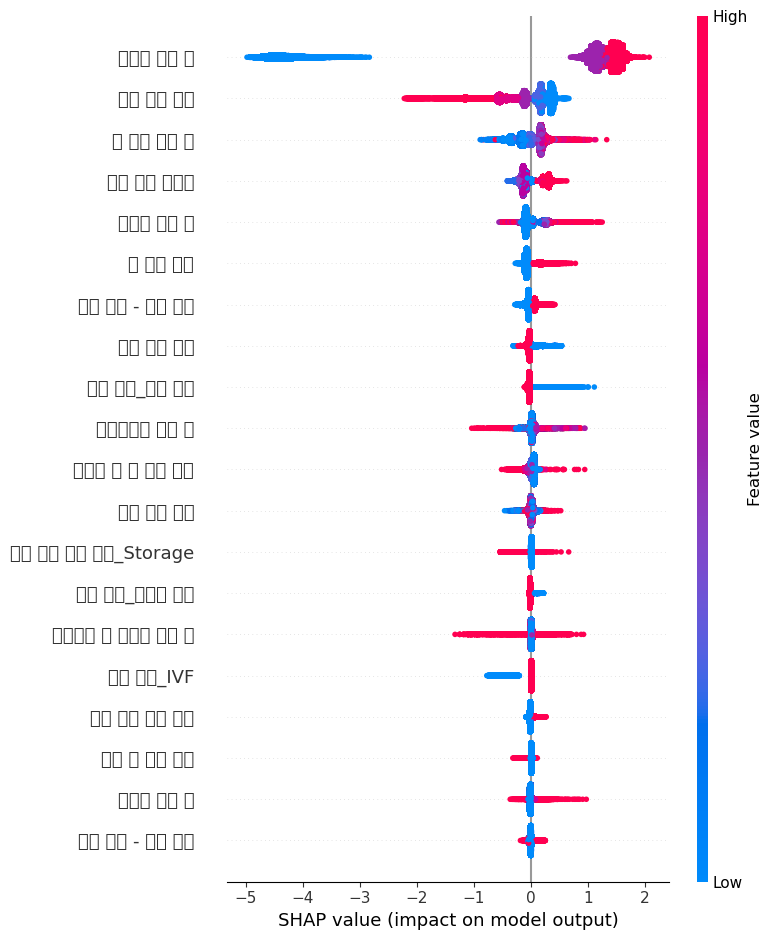


📊 Feature SHAP Values (Mean Absolute Impact)

                    Feature  SHAP Value
22                 이식된 배아 수    1.759443
1                  시술 당시 나이    0.319778
20                총 생성 배아 수    0.183892
33                배아 이식 경과일    0.177072
24                 저장된 배아 수    0.138653
19                  총 임신 횟수    0.100689
10            불임 원인 - 남성 요인    0.062870
2                  배란 자극 여부    0.053085
41              난자 출처_본인 제공    0.053063
21               미세주입된 난자 수    0.052453
17            클리닉 내 총 시술 횟수    0.048775
0                  시술 시기 코드    0.031178
40      배아 생성 주요 이유_Storage    0.027117
42             정자 출처_배우자 제공    0.021878
25          미세주입 후 저장된 배아 수    0.019031
34                시술 유형_IVF    0.018947
3               단일 배아 이식 여부    0.017546
5                남성 부 불임 원인    0.015534
26                 해동된 배아 수    0.014122
9             불임 원인 - 난관 질환    0.013847
8                 불명확 불임 원인    0.011355
37         특정 시술 유형_Unknown    0.011106
23             미세주입 배아 이식 수    0.

In [ ]:
import shap

# ✅ 대표 모델 선택 (LightGBM 기반 SHAP 분석)
explainer = shap.Explainer(models["LightGBM"], X_train)

# ✅ SHAP 값 계산
shap_values = explainer.shap_values(X_train)

# ✅ SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_train)

# ✅ SHAP 값을 데이터프레임으로 변환
shap_df = pd.DataFrame(shap_values, columns=X_train.columns)

# ✅ 각 Feature별 평균 SHAP 값 계산 (절대값 기준 중요도)
shap_importance = shap_df.abs().mean().reset_index()
shap_importance.columns = ["Feature", "SHAP Value"]
shap_importance = shap_importance.sort_values(by="SHAP Value", ascending=False)

# ✅ SHAP 값 출력
print("\n📊 Feature SHAP Values (Mean Absolute Impact)\n")
print(shap_importance)
